In [10]:
import osmnx as ox
import networkx as nx
from network import get_road_net, multistart_downhill_descent, get_Utown
import ast
import sys
sys.path.append("C:\\Users\mbans\Desktop\CMOR492-DWS\DWS")
import json

In [2]:
# place_name = "Stowe, VT, USA"
# get_road_net(place_name, "road_net_3.graphml")

In [5]:
G = ox.load_graphml("road_net_2.graphml")

In [6]:
treatment_nodes = multistart_downhill_descent(G, 40)

In [13]:
with open("C:\\Users\mbans\Desktop\CMOR492-DWS\DWS\optimization_models\context\y_sol.json", "r") as f:
    y_0 = {ast.literal_eval(k): v for k, v in json.load(f).items()}

In [16]:
with open("C:\\Users\mbans\Desktop\CMOR492-DWS\DWS\optimization_models\context\z_sol.json", "r") as f:
    z_0 = {ast.literal_eval(k): v for k, v in json.load(f).items()}

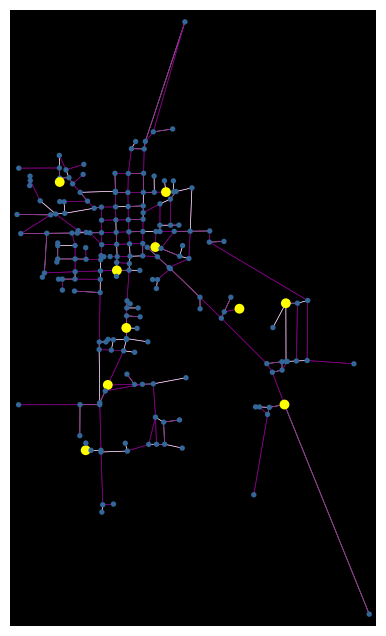

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [29]:
node_colors = []
for node in G.nodes:
    if node in treatment_nodes:
        if y_0[node] == 1:
            node_colors.append("yellow")
        else:
            node_colors.append("#336699")
    else:
        node_colors.append("#336699")


edge_colors = ['white' if z_0[e[0], e[1]] == 1 else 'purple' for e in G.edges]


# node_colors = ['r' if node in treatment_nodes else '#336699' for node in G.nodes()]

node_sizes = [50 if node in treatment_nodes and y_0[node] == 1 else 15 for node in G.nodes()]

ox.plot_graph(G, node_color=node_colors, node_size=node_sizes, edge_color=edge_colors, edge_linewidth=0.5, bgcolor="#000000")

In [ ]:
source_nodes = []
for node in G.nodes:
    if node not in treatment_nodes:
        source_nodes.append(node)

In [21]:
subgraph = nx.ego_graph(G, 59146899, radius=20, distance='length')